Saving Plant_1_Generation_Data.csv to Plant_1_Generation_Data (7).csv
User uploaded file "Plant_1_Generation_Data (7).csv" with length 4839076 bytes
--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB

--- Descriptive Statistics ---

--- Missing Values ---
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 1.37
Root Mean Squared Error (RMSE): 1.17
R-squared (R2): 1.00


/tmp/ipython-input-59764528.py:65: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


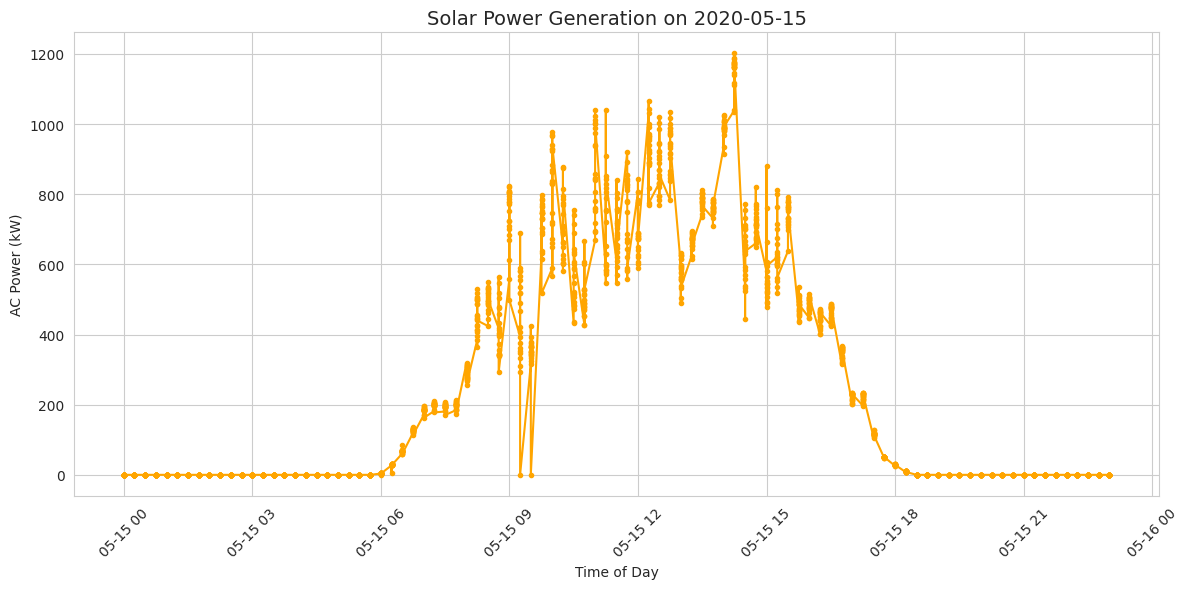

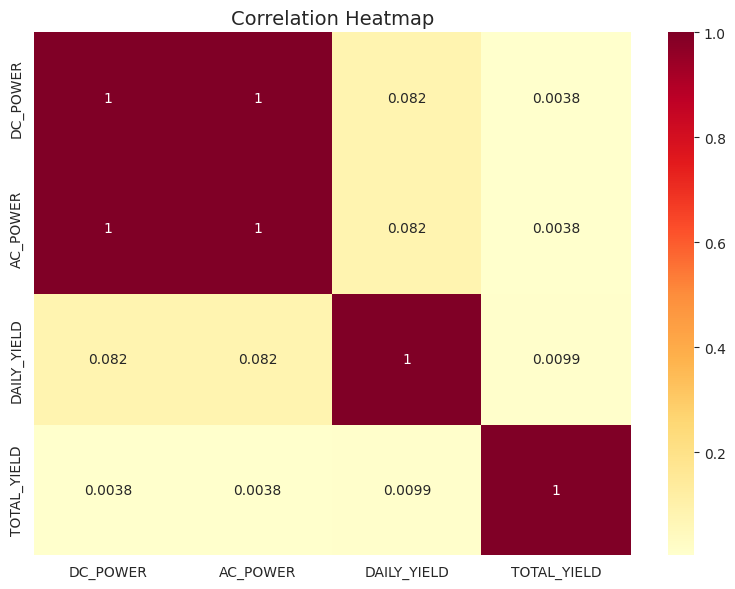

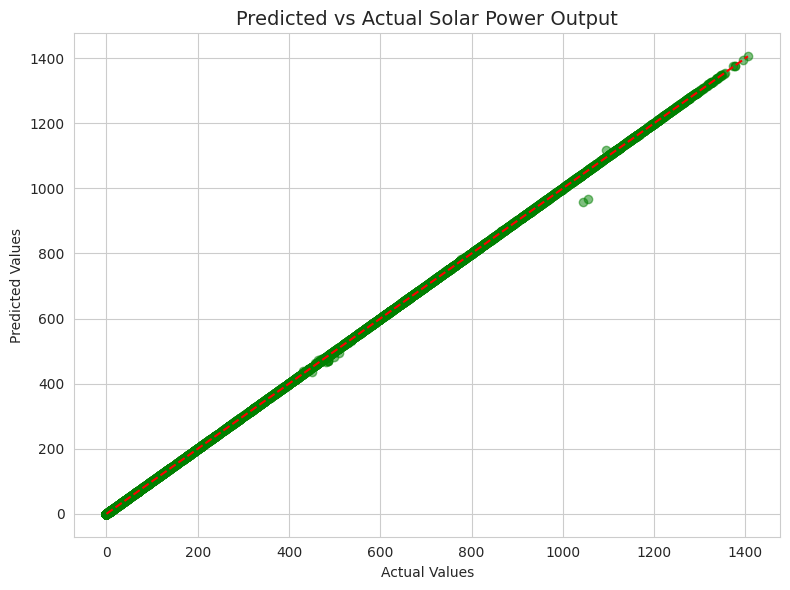

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  import pandas as pd


df = pd.read_csv("Plant_1_Generation_Data.csv")


print("--- DataFrame Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
df.describe()

print("\n--- Missing Values ---")
df.isnull().sum()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv("Plant_1_Generation_Data.csv")


X = df[['DC_POWER']]  # Features (input)
y = df['AC_POWER']    # Target (output)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and implement the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE is just the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# 1. Solar Output vs Time
import matplotlib.pyplot as plt


df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


one_day = df[df['DATE_TIME'].dt.date == pd.to_datetime("2020-05-15").date()]


plt.figure(figsize=(12,6))
plt.plot(one_day['DATE_TIME'], one_day['AC_POWER'], color='orange', marker='.')
plt.title("Solar Power Generation on 2020-05-15", fontsize=14)
plt.xlabel("Time of Day")
plt.ylabel("AC Power (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("solar_power_one_day.png")
plt.show()





# 2. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']].corr(),
            annot=True, cmap="YlOrRd")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# 3. Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Predicted vs Actual Solar Power Output", fontsize=14)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()
plt.savefig("predicted_vs_actual.png")
plt.show()

# Download plots
files.download("solar_power_vs_time.png")
files.download("correlation_heatmap.png")
files.download("predicted_vs_actual.png")


